# <font color='red'>SGD Algorithm to predict movie ratings</font>
              
                                                                                               Submitted By- Rahul Dable

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


<font color='red'>Create your adjacency matrix </font>

In [5]:
u_i = data.user_id
v_j = data.item_id

rating_details = data.rating.tolist()
actual_rating = data.rating.tolist()
user_details = u_i.tolist()
movie_details = v_j.tolist()

In [6]:
from scipy.sparse import csr_matrix

adjacency_matrix_ = csr_matrix((rating_details, (user_details, movie_details)))

In [7]:
adjacency_matrix_df = pd.DataFrame(adjacency_matrix_.todense())

<font color='cyan'>Grader function - 1</font>

In [8]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix_)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [9]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [10]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

In [15]:
import numpy as np
adjacency_matrix_array = adjacency_matrix_.toarray( )
U, Sigma, VT = randomized_svd(adjacency_matrix_array, n_components=300,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 300)
(300,)
(1681, 300)


<font color='red'>Compute mean of ratings</font>

In [16]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    

    return 

In [17]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    
    ratings_mean = np.round(np.mean(ratings), 3)
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    

    return ratings_mean

<font color='cyan'>Grader function -2 </font>

In [18]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [19]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    initializer = [0 for i in range(dim)] 
    # initalize the value to zeros 
    # return output as a list o

    return initializer

In [20]:
dim= adjacency_matrix_.shape[0]
b_i=initialize(dim)

In [21]:
dim= adjacency_matrix_.shape[1]
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [22]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [23]:
def derivative_db(user_id,item_id,rating,U,VT,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    #b_ = 2*((alpha + 1)*b_i[user_id] - rating + mu + c_j[item_id] + np.dot(U[user_id], VT.T[item_id]))
    b_ = (2*alpha*b_i[user_id])-(2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],VT.T[item_id])))
    
    return b_

<font color='cyan'>Grader function -4 </font>

In [24]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix_, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

AssertionError: 

In [25]:
value=derivative_db(312,98,4,U1,V1,mu,alpha)
value

-0.9317891723925795

For derivative_db
- The Desired value = **-0.931**
- The value which I am getting is = **-0.9317891723925795**
- After rounding it to 3, it becomes -0.932 (assertation error).

**As per Email conversation with team@appliedai the values I am getting are correct.**

**Ignoring Grader function -4**


<font color='red'>Compute dL/dc_j</font>

In [26]:
def derivative_dc(user_id,item_id,rating,U,VT,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    c_ = 2*((alpha + 1)*c_j[item_id] - rating + mu + b_i[user_id] + np.dot(U[user_id], VT.T[item_id]))
    #c_ = (2*alpha*c_j[item_id])-(2*(rating-mu-c_j[item_id]- b_i[user_id]-np.dot(U[user_id],VT.T[item_id])))
    return c_


<font color='cyan'>Grader function - 5 </font>

In [27]:
def grader_dc(value):
    assert(value==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix_, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_dc(58,504,5,U1,V1,mu, alpha)
grader_dc(value)

AssertionError: 

In [28]:
value=derivative_dc(58,504,5,U1,V1,mu, alpha)
value

-2.930039507958737

For derivative_db
- Value to assertain = **-2.929**
- I am getting = **-2.930039507958737**
- After rounding it to 3, it becomes -0.932 (assertation error).

**As per Email conversation with team@appliedai the values I am getting are correct.**

**Ignoring Grader function -5**

_____________

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:59<00:00, 53.96s/it]


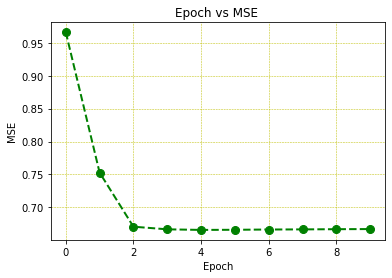

In [29]:
#%%time

#dim= adjacency_matrix.shape[0]
#b_i=initialize(dim)


#dim= adjacency_matrix.shape[1]
#c_j=initialize(dim)


#adjacency_matrix = np.array(adjacency_matrix_)

epochs = 10
lr = 0.001
MSE_list = []

#actual_rating = pd.DataFrame(adjacency_matrix)

for e in tqdm(range(epochs)):
    all_users_ratings = []

    for i in range(U.shape[0]):
        user_ratings = []
        for j in range(VT.shape[1]):

            b_value=derivative_db(i,j,adjacency_matrix_array[i][j],U,VT,mu,alpha)
            b_i[i] = b_i[i] - lr*b_value

            c_value = derivative_dc(i,j,adjacency_matrix_array[i][j],U,VT,mu, alpha)
            c_j[j] = c_j[i] - lr*c_value

            y_pred = mu + b_i[i] + c_j[j] + np.dot(U[i], VT.T[j])
            user_ratings.append(y_pred)
        all_users_ratings.append(user_ratings)

    predicted_ratings = pd.DataFrame(all_users_ratings)
    actual_rating = pd.DataFrame(adjacency_matrix_array)
    MSE = np.round((np.square(np.array(predicted_ratings) - np.array(actual_rating)).mean(axis=None)), 4)
    MSE_list.append(MSE)

    
plt.plot([i for i in range(epochs)], MSE_list, 
                                     color='green', marker='o', linestyle='--',
                                     linewidth=2, markersize=8)

plt.grid(color='y', linestyle='--', linewidth=0.5)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Epoch vs MSE ")
#plt.xkcd()
plt.show()

In [30]:
print(MSE_list)

[0.9661, 0.7527, 0.6705, 0.6665, 0.6656, 0.6658, 0.6662, 0.6664, 0.6667, 0.6669]


____________

<font color='red'> Task 2</font>

In [31]:
user_info = pd.read_csv('user_info.csv')
user_info

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5
...,...,...,...,...
938,938,26,0,939
939,939,32,1,940
940,940,20,1,941
941,941,48,0,942


In [32]:
user_matrix = pd.DataFrame(U)
user_matrix['Is_Male'] = user_info.is_male
user_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Is_Male
0,0.066226,0.007889,-0.012531,-0.086164,0.024870,0.006661,0.080051,-0.027567,0.067568,0.020422,...,0.042233,-0.028445,0.011708,0.036218,-0.005871,0.047418,0.035521,-0.031427,0.034933,1
1,0.013644,-0.048895,0.056554,0.015809,-0.012036,0.017731,0.010708,-0.010217,0.028434,-0.009383,...,0.075701,-0.025913,-0.041233,0.016309,0.021350,0.010320,0.044103,-0.029068,-0.013602,0
2,0.005438,-0.025128,0.020028,0.032832,0.035080,0.001919,0.007690,-0.000996,-0.021169,-0.003201,...,0.012493,-0.026614,0.038926,-0.027825,0.040551,0.004009,-0.009401,-0.005497,0.018265,1
3,0.005704,-0.018211,0.010898,0.021867,0.013920,-0.014180,0.012246,-0.009111,-0.012774,0.006112,...,-0.007032,-0.059955,0.045249,0.020849,-0.028334,-0.028730,-0.000499,0.006983,0.064996,1
4,0.034122,0.009005,-0.044054,-0.016049,0.004326,-0.021502,0.095574,0.079504,-0.017152,0.029360,...,-0.058646,0.051648,-0.039851,0.049883,0.063785,0.008650,-0.033055,0.033556,0.009992,0


In [33]:
y = user_matrix.Is_Male
X = user_matrix.drop('Is_Male', axis=1)

### Applying classification model without data scaling.

In [34]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression()
clf_logistic.fit(X, y)

y_pred = clf_logistic.predict(X)
y_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Dumb Model as the model is predicting everything as 1.

Lets try to scale the data and apply Logistic Regression.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.958621,0.590646,-0.651603,-2.795768,0.765587,0.392285,2.350677,-0.805625,2.122283,0.573709,...,0.414251,1.295367,-0.842886,0.363447,1.118968,-0.182385,1.467988,1.081397,-0.967801,1.087310
1,-0.523289,-1.248412,1.537517,0.361269,-0.367732,0.737953,0.204032,-0.272371,0.919312,-0.342898,...,1.373237,2.323114,-0.765068,-1.262310,0.507582,0.653540,0.328700,1.344939,-0.895338,-0.403260
2,-0.910626,-0.478659,0.380105,0.888286,1.079118,0.244221,0.110625,0.011024,-0.605473,-0.152772,...,0.901704,0.382104,-0.786627,1.199269,-0.847743,1.243151,0.134902,-0.298134,-0.171520,0.575438
3,-0.898067,-0.254636,0.090823,0.548809,0.429329,-0.258505,0.251661,-0.238393,-0.347414,0.133623,...,0.010399,-0.217466,-1.810974,1.393419,0.646994,-0.872185,-0.870542,-0.024764,0.211726,2.010602
4,0.443279,0.626795,-1.650473,-0.625034,0.134735,-0.487132,2.831201,2.485191,-0.481991,0.848592,...,-1.017612,-1.802440,1.617823,-1.219857,1.538604,1.956648,0.277434,-1.024538,1.027720,0.321344


In [36]:
clf_logistic.fit(X_scaled, y)
y_pred_scaled = clf_logistic.predict(X_scaled)
y_pred_scaled[0:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_cmatrics(Y_true_cv, Y_predicted_cv):
    print("Confusion Matrics :")
    
    #reference: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

    confusion_matrix_cv = metrics.confusion_matrix(Y_true_cv, Y_predicted_cv)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion_matrix_cv.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         confusion_matrix_cv.flatten()/np.sum(confusion_matrix_cv)]
    labels = [f'{v1}\n{v2}\n{v3}'for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix_cv, annot=labels, fmt='', cmap='BuPu', ax=None,
                xticklabels=['Predicted NO', 'Predicted YES'], yticklabels=['Actual NO', 'Actual YES'], 
                linecolor='black', linewidths=0.5)

    plt.show()
    print('-'*45)
    
    #return confusion_matrix_cv
        

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       273
           1       0.94      0.96      0.95       670

    accuracy                           0.93       943
   macro avg       0.92      0.91      0.91       943
weighted avg       0.93      0.93      0.93       943

Confusion Matrics :


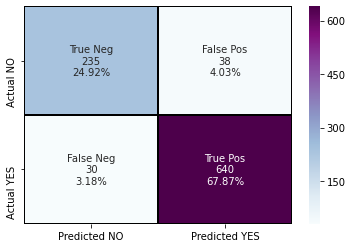

---------------------------------------------


In [50]:
from sklearn import metrics
print(metrics.classification_report(y, y_pred_scaled))
plot_cmatrics(y, y_pred_scaled)

**Observation**

-  It is observed that as we have applied classification model to the computed user metrics, model has predicted correct gender with 92% accuracy and high TP and TN values. Therefore we can conclude that the feature "Gender" has a significant impact on the ratings given by the user to specific movie.

___________